Lab: neural network fundamentals
-----

In [1]:
reset -fs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from neural_network import *

In [56]:
from pandas import DataFrame

TODO: Create 2d array for X

X[:,0] is from (0, n), where is n is 30 to start
X[:,1] are random numbers

In [41]:
# Generate samples for X
n = 30
X = np.zeros((n,2))
X.shape

(30, 2)

In [44]:
X[:,0] = range(30)
X[:,1] = np.random.random(size=n)

In [45]:
X

array([[  0.        ,   0.96800942],
       [  1.        ,   0.34895572],
       [  2.        ,   0.30209377],
       [  3.        ,   0.59834974],
       [  4.        ,   0.76015407],
       [  5.        ,   0.28638219],
       [  6.        ,   0.93775959],
       [  7.        ,   0.35820848],
       [  8.        ,   0.96973566],
       [  9.        ,   0.92764186],
       [ 10.        ,   0.92923964],
       [ 11.        ,   0.23218814],
       [ 12.        ,   0.68523815],
       [ 13.        ,   0.3999211 ],
       [ 14.        ,   0.73013222],
       [ 15.        ,   0.59789928],
       [ 16.        ,   0.78961305],
       [ 17.        ,   0.89217589],
       [ 18.        ,   0.32595231],
       [ 19.        ,   0.52902429],
       [ 20.        ,   0.4858303 ],
       [ 21.        ,   0.68742914],
       [ 22.        ,   0.4806516 ],
       [ 23.        ,   0.85939915],
       [ 24.        ,   0.44191482],
       [ 25.        ,   0.11308727],
       [ 26.        ,   0.39224089],
 

In [96]:
X.shape

(30, 2)

TODO: Create y, where y is the following function of X[:,0]

In [13]:
poly_function = lambda x: 2 + 0.5 * x + 3 * x ** 2 + 5 * stats.norm.rvs(0, 10)

In [46]:
y = poly_function(X[:,0])

In [64]:
y = y.reshape(y.shape[0], 1)
y.shape

(30, 1)

In [65]:
y

array([[ 0.01460453],
       [ 0.01596369],
       [ 0.01965286],
       [ 0.02567202],
       [ 0.03402119],
       [ 0.04470035],
       [ 0.05770951],
       [ 0.07304867],
       [ 0.09071783],
       [ 0.11071699],
       [ 0.13304615],
       [ 0.15770531],
       [ 0.18469446],
       [ 0.21401362],
       [ 0.24566278],
       [ 0.27964193],
       [ 0.31595108],
       [ 0.35459024],
       [ 0.39555939],
       [ 0.43885854],
       [ 0.48448769],
       [ 0.53244684],
       [ 0.58273599],
       [ 0.63535513],
       [ 0.69030428],
       [ 0.74758343],
       [ 0.80719257],
       [ 0.86913171],
       [ 0.93340086],
       [ 1.        ]])

TODO: Plot X and y

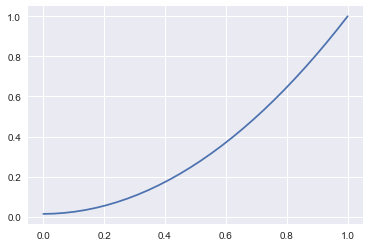

In [66]:
plt.plot(X[:,0],y)

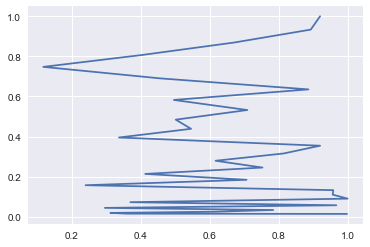

In [67]:
plt.plot(X[:,1],y)

## Normalize

In [68]:
# Normalize data to help learning rate
X = X/np.amax(X, axis=0)
X

array([[ 0.        ,  0.99821989],
       [ 0.03448276,  0.35984623],
       [ 0.06896552,  0.31152177],
       [ 0.10344828,  0.61702355],
       [ 0.13793103,  0.78387761],
       [ 0.17241379,  0.29531985],
       [ 0.20689655,  0.96702599],
       [ 0.24137931,  0.36938776],
       [ 0.27586207,  1.        ],
       [ 0.31034483,  0.9565925 ],
       [ 0.34482759,  0.95824014],
       [ 0.37931034,  0.23943447],
       [ 0.4137931 ,  0.70662365],
       [ 0.44827586,  0.41240218],
       [ 0.48275862,  0.75291882],
       [ 0.51724138,  0.61655903],
       [ 0.55172414,  0.81425597],
       [ 0.5862069 ,  0.92001968],
       [ 0.62068966,  0.33612491],
       [ 0.65517241,  0.54553453],
       [ 0.68965517,  0.50099251],
       [ 0.72413793,  0.70888301],
       [ 0.75862069,  0.49565219],
       [ 0.79310345,  0.88622002],
       [ 0.82758621,  0.45570648],
       [ 0.86206897,  0.1166166 ],
       [ 0.89655172,  0.40448227],
       [ 0.93103448,  0.67110668],
       [ 0.96551724,

In [71]:
y = y/np.amax(y, axis=0) 
print(y.shape)
y

(30, 1)


array([[ 0.01460453],
       [ 0.01596369],
       [ 0.01965286],
       [ 0.02567202],
       [ 0.03402119],
       [ 0.04470035],
       [ 0.05770951],
       [ 0.07304867],
       [ 0.09071783],
       [ 0.11071699],
       [ 0.13304615],
       [ 0.15770531],
       [ 0.18469446],
       [ 0.21401362],
       [ 0.24566278],
       [ 0.27964193],
       [ 0.31595108],
       [ 0.35459024],
       [ 0.39555939],
       [ 0.43885854],
       [ 0.48448769],
       [ 0.53244684],
       [ 0.58273599],
       [ 0.63535513],
       [ 0.69030428],
       [ 0.74758343],
       [ 0.80719257],
       [ 0.86913171],
       [ 0.93340086],
       [ 1.        ]])

TODO: Train the NN from lecture

In [72]:
# Instantiate neural network
nn = NeuralNetwork()

In [75]:
cost = nn.cost_function(X, y)
print(cost)

[ 1.70616452]


In [76]:
t = Trainer(nn)
t.train(X, y)

         Current function value: 0.021718
         Iterations: 50
         Function evaluations: 55
         Gradient evaluations: 55


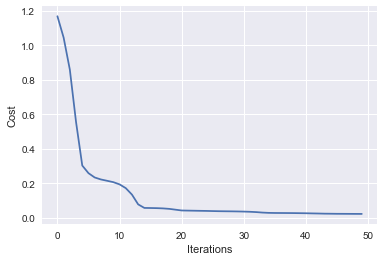

In [77]:
plot(t.J)
grid(1)
xlabel('Iterations')
ylabel('Cost');

TODO: Plot observed for y. On the same figure, plot predicted for y. The domain is X[:,0].

In [85]:
y_hat = nn.forward(X)

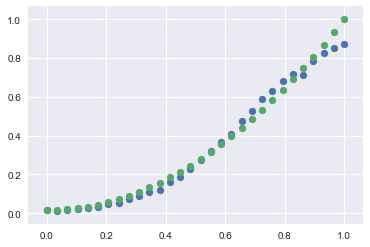

In [88]:
plt.scatter(X[:,0],y_hat)
plt.scatter(X[:,0],y)

TODO: Plot the residuals, aka observed versus predicted for y

In [89]:
res = y - y_hat

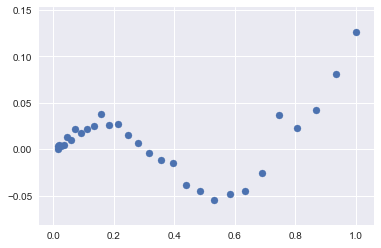

In [90]:
plt.scatter(y, res)

TODO: Plot cost over iterations

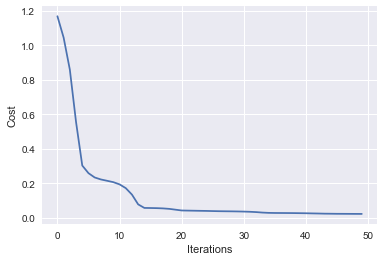

In [91]:
plot(t.J)
grid(1)
xlabel('Iterations')
ylabel('Cost');

TODO: Summarize your model

In [93]:
print(y.shape)
DataFrame({'y predicted': y_hat.flatten().tolist(),
           'y observed': y.flatten().tolist()})

(30, 1)


,y observed,y predicted
0,0.014605,0.014135
1,0.015964,0.012352
2,0.019653,0.015424
3,0.025672,0.021884
4,0.034021,0.029232
5,0.044700,0.031498
6,0.057710,0.047862
7,0.073049,0.051383
8,0.090718,0.072775
9,0.110717,0.088464


<details><summary>
Click here for a hints (if stuck)
</summary>
Check the shape of y. Compare to X and values from lecture
<br>
<br>
Did you normalize?
</details>

-----

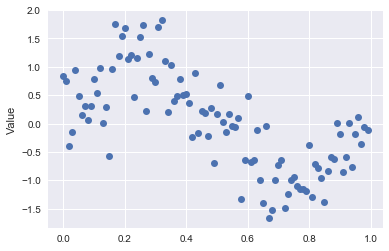

In [157]:
# Let's go crazy with very nonlinear data
# https://github.com/JoeFannie/Polynomial-Regression/blob/master/src/Polyfit%26Lasso.ipynb

n = 100
t = np.arange(0,1.0,0.001)
x = np.arange(0,1,1.0/n)
y = np.random.normal(0,0.5,n) + np.sin(2*np.pi*x*1000/1000)

plt.plot(x,y,'o');
plt.ylabel('Value');

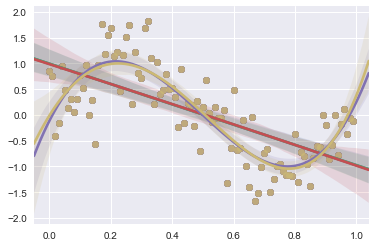

In [158]:
# Fit different polynominals
for order in range(5):
    sns.regplot(x=x,
               y=y,
               order=order);

TODO: Create 2d array for X

X[:,0] is x  
X[:,1] are random numbers

In [159]:
# Generate samples for X
X = np.zeros((n,2))
X.shape

(100, 2)

In [160]:
x

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99])

In [161]:
X[:,0] = x
X[:,1] = np.random.random(size=n)

## Shift y 

In [162]:
y = y - np.min(y)
y

array([ 2.50785598,  2.42024442,  1.26126965,  1.50653849,  2.60972207,
        2.14781709,  1.80831571,  1.97071242,  1.72010979,  1.96615199,
        2.44877781,  2.19548217,  2.63591872,  1.66678549,  1.96337834,
        1.09679155,  2.63258252,  3.42370886,  2.8473348 ,  3.20708498,
        3.35389555,  2.80507471,  2.87944616,  2.13130159,  2.81814897,
        3.18303572,  3.40348623,  1.879382  ,  2.89417362,  2.47380915,
        2.38887373,  3.35807366,  3.48522846,  2.77320853,  1.87610536,
        2.69593964,  2.06965913,  2.15701859,  2.45594927,  2.15927535,
        2.18698841,  2.01955512,  1.42835061,  2.56300755,  1.50591763,
        1.89368866,  1.85171013,  1.4479977 ,  1.93823041,  0.96452945,
        1.82761716,  2.34344345,  1.69393531,  1.5199644 ,  1.82459473,
        1.6129346 ,  1.60540492,  1.7612085 ,  0.33790486,  1.0216033 ,
        2.15054943,  0.98327488,  1.01472235,  1.55748742,  0.66956482,
        0.27147244,  1.62042989,  0.        ,  0.14312576,  0.66

TODO: Create the y for training the model

## Normalize

In [163]:
# Normalize data to help learning rate
X = X/np.amax(X, axis=0)
X.shape

(100, 2)

In [164]:
y = y/np.amax(y, axis=0)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)


TODO: Train the NN from lecture

In [184]:
# Instantiate neural network
nn = NeuralNetwork()

In [185]:
cost = nn.cost_function(X, y)
print(cost)

[ 3.88194883]


In [186]:
t = Trainer(nn)
t.train(X, y, maxiter=1000)

         Current function value: 0.874324
         Iterations: 1000
         Function evaluations: 1155
         Gradient evaluations: 1155


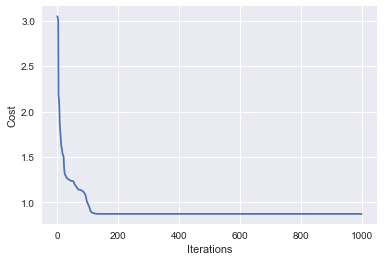

In [187]:
plot(t.J)
grid(1)
xlabel('Iterations')
ylabel('Cost');

TODO: Plot observed for y. On the same figure, plot predicted for y. The domain is X[:,0].

In [188]:
y_hat = nn.forward(X)

In [189]:
#y_hat = y_hat - np.min(y_hat)

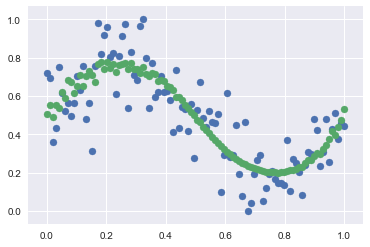

In [190]:
plt.scatter(X[:,0],y)
plt.scatter(X[:,0],y_hat)

TODO: Plot the residuals, aka observed versus predicted for y

In [191]:
res = y - y_hat

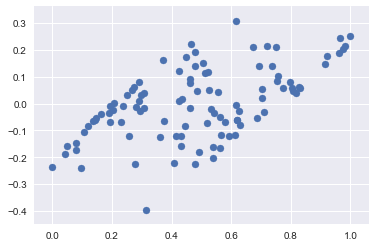

In [192]:
plt.scatter(y, res)

TODO: Plot cost over iterations

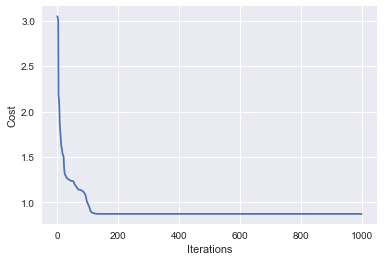

In [193]:
plot(t.J)
grid(1)
xlabel('Iterations')
ylabel('Cost');

TODO: Summarize your model

TODO: Reflect on what you learned about neural networks

TODO: Play with http://playground.tensorflow.org/. What insights do you get?

-----
Challenge Activities
----

TODO: Fit Neural Network classifier on the spiral dataset.

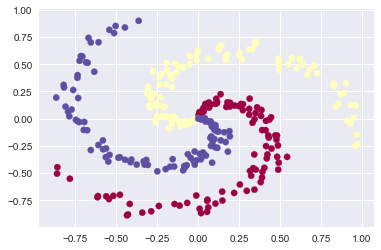

In [7]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral);

<details><summary>
Click here for a hint…
</summary>
http://cs231n.github.io/neural-networks-case-study/
</details>

-----

TODO: Fit Neural Network classifier on XOR data in Chapter 6 of Deep Learning book

<br>
<br> 
<br>

----